<a href="https://colab.research.google.com/github/quanmtran/Coursera_Capstone/blob/main/Coursera_Capstone_Project_Report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Coursera Capstone Project - Suburbs in Melbourne, VIC, Australia**
*by Quan Tran*

## **1. Introduction**




Melbourne is one among the world's most liveable cities which has been attracting many international students from different countries around the globe. The city was ranked the third best student city in the world according to [QS Best Student Cities 2019](https://www.topuniversities.com/city-rankings/2019). However, before moving into a brand new city, international students will probably have a lot of questions need to be answered. As starters, when he/she has an idea of where their education provider is located, the first question that comes into their mind would be where to live. While it is better to find a place that is not far away from school, there are other factors that need to be taken into consideration like how close it is to venues in need, for example, supermarkets, grocery stores and recreational areas. Understanding these concerns, we have done this data-driven analysis project to explore the suburbs in Melbourne, targeting at international students who are about to come to the city. We hope that our findings would help those newcomers to have a better idea about suburbs across the city of Melbourne in order to make a decision on where they want to reside in.

## **2. Data**


We decided to narrow our scope on suburbs within Melbourne's metropolitan area, as opposed to regional area. 

*   We have found and scraped suburb names and coordinates from this [web page](https://www.geonames.org/postal-codes/AU/VIC/victoria.html). The coordinates will be used to visualize the suburbs on an interactive map and to explore nearby areas. However, there are still suburbs missing from this list. We would still carry on with our analysis on this dataset since it is the most efficient way for us to collect such amount of geographical data. This issue of insufficient data needs to be addressed in future improvement.
*   We have used Foursquare API to retrieve nearby venues around each suburb based on its coordinates. The suburbs will then be explored and grouped together based on their similarity in terms of what venue category and how many of them can be found in the area.



## **3. Methodology**

First, we formatted the scraped data into a dataframe with three columns: *Suburb*, *Latitude* and *Longitude*. This dataframe includes 144 suburbs in Melbourne's metropolitan area.

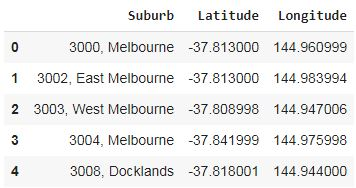


With latitudes and longitudes, we then visualized the suburbs of Melbourne on an interactive map using the Folium library in Python.

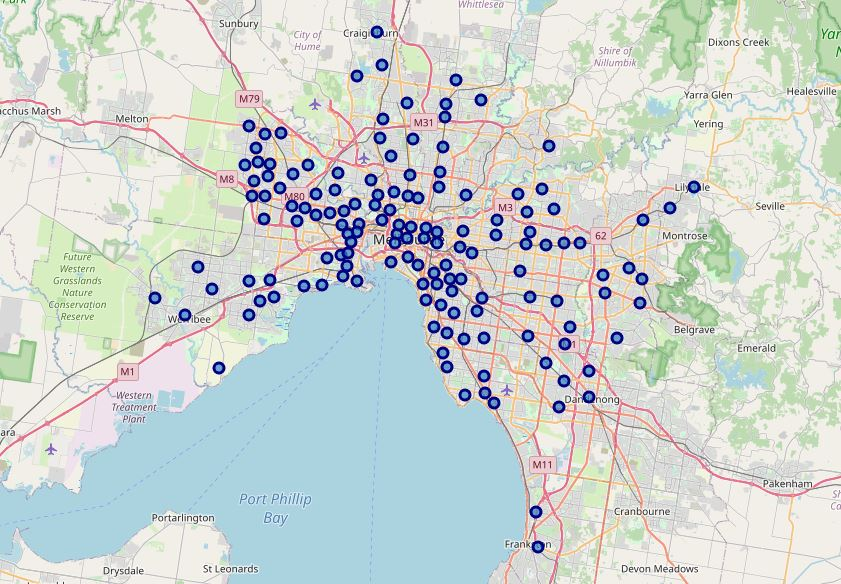

We used Foursquare API to retrieve information of venues, i.e., venue's name and category, within a radius of 1 km around each suburb based on their coordinates. The maximum number of venues retrieved for each suburb is 100, which is Foursquare API's default limit value. The result was put into a dataframe as follows, in which each row represents one venue retrieved.

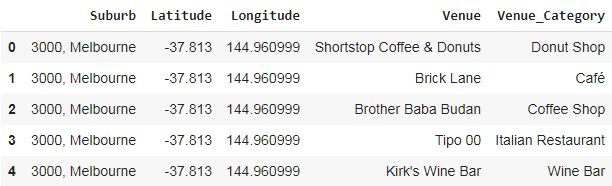

When we count the number of venues retrieved for each suburb as shown in the table below, we can see that in some suburbs there are 100 venues have been found, which is the limit value set by Foursquare API. It means that there could be other venues around these suburbs that have not been retrieved. In contrast, some suburbs at the bottom of the list have only a few nearby venues. It could be due to the fact that we only used one pair of latitude and longitude to locate a suburb with the radius of 1 km around that point, which might not be representative of the whole suburb. These issues should be considered as limitations in our approach.

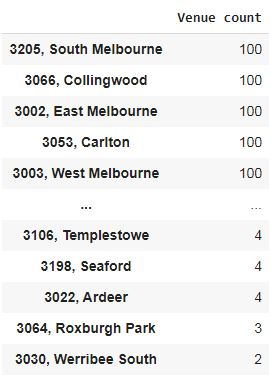

We noticed that there are hundreds of unique venue category, which may inflate the data dimensionality if we feed them to the model in the next steps. Therefore, we decided to group those categories and narrow down our focus on the groups that we assumed a typical student would be interested in. Those groups are:
1. Market/Grocery
2. Food court/Restaurant
3. Dessert shop
4. Coffee shop
5. Shopping
6. Entertainment (e.g., movies, museum, gallery, bar, pub)
7. Fitness/Sports (e.g., gym, pool, basketball court)
8. Recreational area (e.g., park, garden, beach)

The dataframe with a new column called Venue_Grouped_Category is as follows.

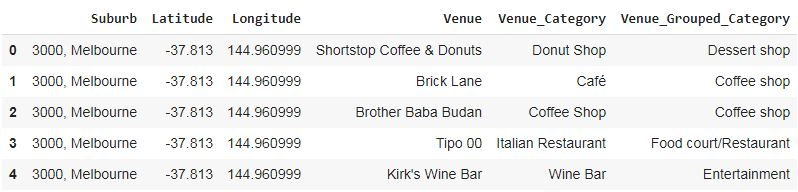

We then counted the frequency of each category found in each suburb.

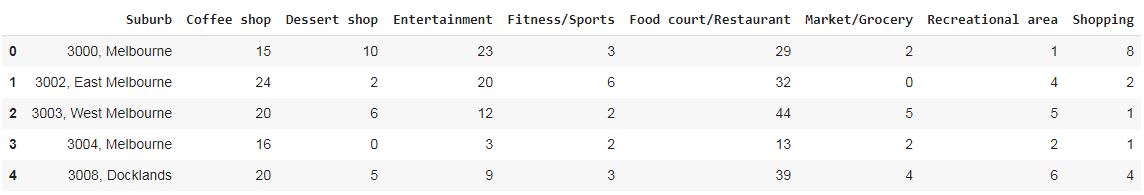

As shown in the dataframe above, each row represent a suburb with the frequency of 8 venue categories found in its area. We used these values to cluster the suburbs using K-means clustering. Since the attributes spread in different ranges and K-means is a distance-based algorithm, we first standardized the data before feeding it to the model. Then we ran the model with the value of k, or the number of clusters, ranging from 1 to 20 in order to find the best value of k. We decided to go with k=4 based on the Elbow plot below.

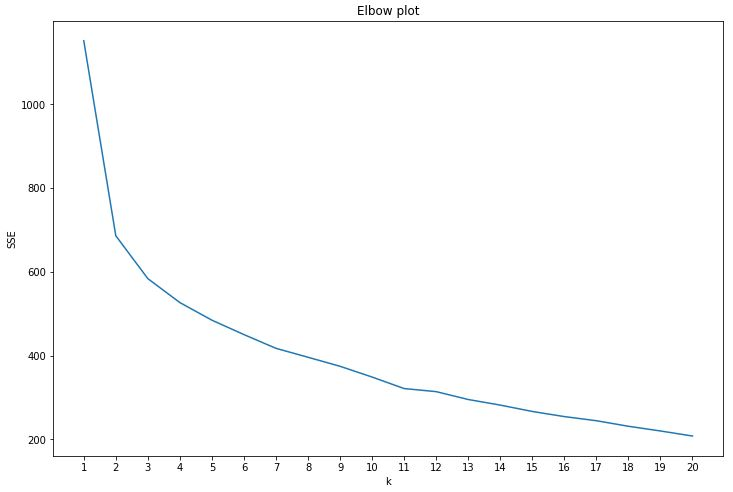

We ran the algorithm with k=4 and added the cluster labels to the suburbs.

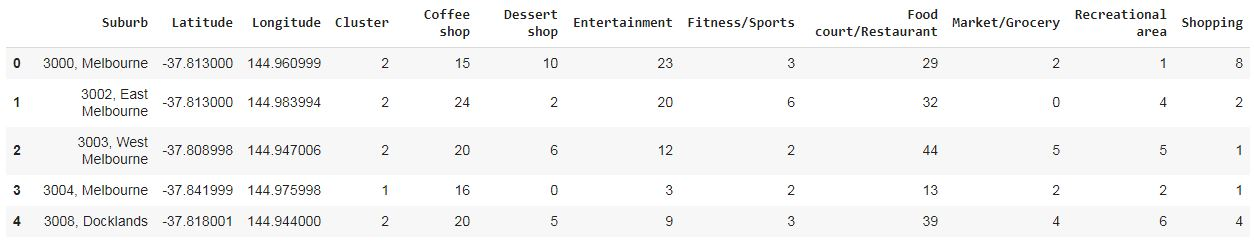

## **4. Results**

The map of clusters and the cluster centers are shown below. The clusters were color-coded as follows.
*   Cluster 0: Red
*   Cluster 1: Purple
*   Cluster 2: Blue
*   Cluster 3: Yellow






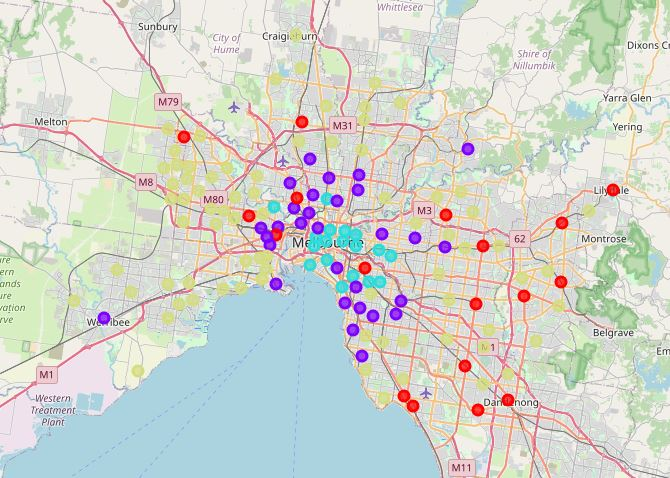

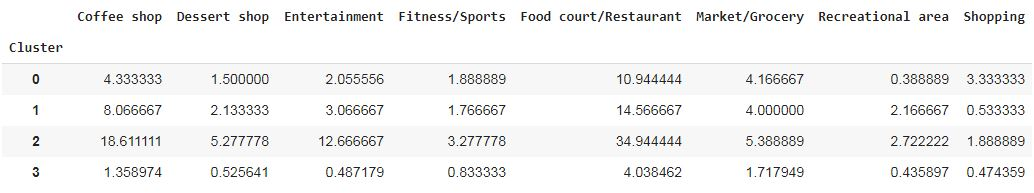

Based on the map and the cluster centers, we would describe each cluster as follows.
*   Cluster 2 (Blue): Very close to the city center, with more venues of most categories than any other cluster. Especially there are many coffee shops and food courts/restaurants.
*   Cluster 1 (Purple): Close to the city center, with decent quantities of coffee shops, food courts/restaurants, market/grocery and recreational areas.
*   Cluster 0 (Red): Far away from the city center, with decent quantities of coffee shops, food courts/restaurants, market/grocery and shopping centers.
*   Cluster 3 (Yellow): Far away from the city center, very few venues of each category.









## **5. Discussion**

Our findings suggest that there are many venues of various categories can be found in suburbs that are close to the city center, i.e., Cluster 1 (Purple) and 2 (Blue). There are also suburbs that are far away from the city center, i.e., Cluster 0 (Red), in which we can still find decent quantities of venues like markets, coffee shops and food courts. We would recommend international students to match their preferences with the features of suburb clusters that we have presented in order to pick the most suitable suburb to reside in.

We do acknowledge that there are still limitations present in our analysis that need to be addressed in future improvements. First of all, we picked only a single pair of coordinates to locate each suburb and retrieve venues within 1 km around that point, which might not be representative of the area. Secondly, due to Foursquare API's limit number of venues to be retrieved, there are suburbs around which not all venues have been retrieved, which might affect the accuracy of our analysis. Thirdly, our analysis of clustering suburbs was done solely based on the number of venues found in the areas, while there are other important attributes, e.g., rental price, population and crime rate, which could have brought additional values to our findings, allowing us to make better recommendations.

## **6. Conclusion**

We hope that not only international students but anyone who is about to move into Melbourne would find our analysis helpful and have a better idea of which suburb would fit their personal preferences, so they can enjoy and make the best out of the time spent in this city.